In [1]:
# load in dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# read cleaned csv file into a df
df = pd.read_csv('Data/fm_arrest.csv')

df.head()

,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,159838726,2017-01-01,1,1,2017,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,M,M,14,0,18-24,M,WHITE,40.750350,-73.983175,POINT (-73.98317545899994 40.750350440000034)
1,159824786,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,18,0,25-44,M,WHITE,40.762971,-73.971870,POINT (-73.97186979099996 40.76297132000008)
2,159840237,2017-01-01,1,1,2017,"FORGERY,ETC.,UNCLASSIFIED-FELONY",FORGERY,F,B,40,0,25-44,M,WHITE HISPANIC,40.807919,-73.919017,POINT (-73.91901728199997 40.80791877300004)
3,159828861,2017-01-01,1,1,2017,BAIL JUMPING 3,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,K,67,0,25-44,M,BLACK,40.650740,-73.910667,POINT (-73.91066707899995 40.650739599000076)
4,159834533,2017-01-01,1,1,2017,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,60,0,18-24,M,BLACK,40.573763,-73.992878,POINT (-73.99287775699997 40.573763375000055)


In [3]:
# drop unnecessary columns
df.drop(['ARREST_KEY', 'ARREST_DATE', 'month', 'day', 'year', 'PD_DESC', 'OFNS_DESC', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'Latitude', 
         'Longitude', 'Lon_Lat'], axis=1, inplace=True)

In [4]:
df.head()

,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,M,M,18-24,M,WHITE
1,M,M,25-44,M,WHITE
2,F,B,25-44,M,WHITE HISPANIC
3,M,K,25-44,M,BLACK
4,M,K,18-24,M,BLACK


M    622748
F    393711
Name: LAW_CAT_CD, dtype: int64


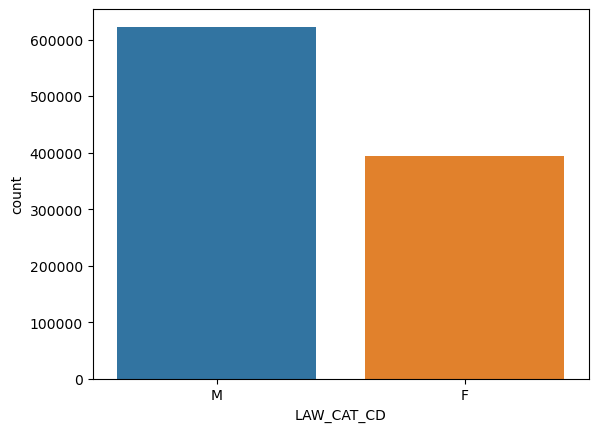

In [5]:
# Check the distribution of the target variable
print(df['LAW_CAT_CD'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='LAW_CAT_CD', data=df)
plt.show()

In [6]:
# Encode categorical variables
le = LabelEncoder()
df['ARREST_BORO'] = le.fit_transform(df['ARREST_BORO'])
df['LAW_CAT_CD'] = le.fit_transform(df['LAW_CAT_CD'])
df['AGE_GROUP'] = le.fit_transform(df['AGE_GROUP'])
df['PERP_SEX'] = le.fit_transform(df['PERP_SEX'])
df['PERP_RACE'] = le.fit_transform(df['PERP_RACE'])

In [7]:
# Check the distribution of the target variable again
print(df['LAW_CAT_CD'].value_counts())

1    622748
0    393711
Name: LAW_CAT_CD, dtype: int64


In [8]:
# Split the data into training and testing sets
X = df.drop('LAW_CAT_CD', axis=1)
y = df['LAW_CAT_CD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a random forest classifier on the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Use the trained model to make predictions on the testing set
y_pred = clf.predict(X_test)

Accuracy: 0.6197686087007851
[[  7092  71608]
 [  5690 118902]]


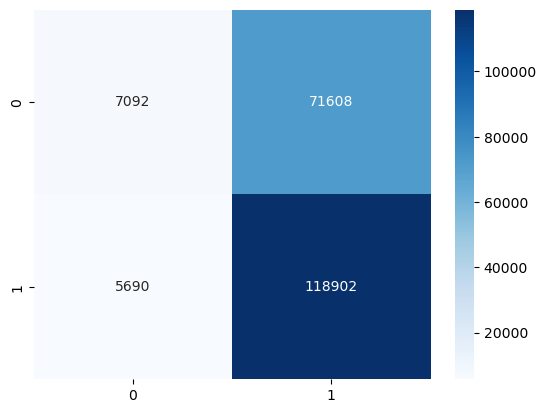

In [11]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot a confusion matrix to visualize the performance of the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()